In [51]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import multilabel_confusion_matrix # For separate confusion matrix for each class
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# Problem Statement 

# Data Gathering

In [3]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Exploratory Data Analysis

### PassengerId

In [6]:
df['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [7]:
df = df.drop('PassengerId',axis=1)
df

,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Gender    891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### Pclass

In [9]:
df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [10]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
pclass_dict = {'pclass_1':1,'pclass_2':2,'pclass_3':3}
pclass_dict

{'pclass_1': 1, 'pclass_2': 2, 'pclass_3': 3}

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Gender    891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### Name

In [14]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [15]:
df = df.drop('Name',axis = 1)
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


### Gender

In [17]:
df['Gender']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Gender, Length: 891, dtype: object

In [18]:
df['Gender'].value_counts()

male      577
female    314
Name: Gender, dtype: int64

In [19]:
df['Gender'].replace({'male':1,'female':0},inplace = True)

In [20]:
df['Gender'].value_counts()

1    577
0    314
Name: Gender, dtype: int64

In [21]:
gender_dict = {'male':1,'female':0}
gender_dict

{'male': 1, 'female': 0}

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


### Age

In [23]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [24]:
df['Age'].isna().sum()

177

In [25]:
df['Age'].median()

28.0

In [26]:
df['Age'].fillna(df['Age'].median(),inplace = True)

In [27]:
df['Age'].isna().sum()

0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


### SibSp

In [29]:
df['SibSp']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [30]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


### Parch

In [32]:
df['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [33]:
df['Parch'].isna().sum()

0

In [34]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


### Ticket

In [36]:
df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [37]:
df = df.drop('Ticket',axis = 1)
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,NaN,S
887,1,1,0,19.0,0,0,30.0000,B42,S
888,0,3,0,28.0,1,2,23.4500,NaN,S
889,1,1,1,26.0,0,0,30.0000,C148,C


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


### Fare

In [39]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [40]:
df['Fare'].isna().sum()

0

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


### Cabin

In [42]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [43]:
df = df.drop('Cabin',axis = 1)
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,28.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


### Embarked

In [45]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [46]:
df['Embarked'].isna().sum()

2

In [47]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace = True)

In [48]:
df['Embarked'].isna().sum()

0

In [49]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
label_encoder = preprocessing.LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [53]:
df['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [54]:
embarked_dict = {'S':2,'C':0,'Q':1}
embarked_dict

{'S': 2, 'C': 0, 'Q': 1}

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB


# Feature engineering

<AxesSubplot:>

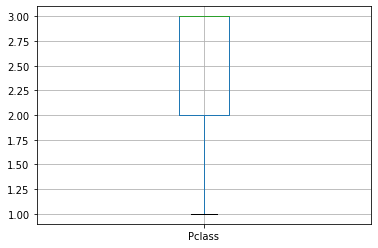

In [56]:
df[['Pclass']].boxplot()

<AxesSubplot:>

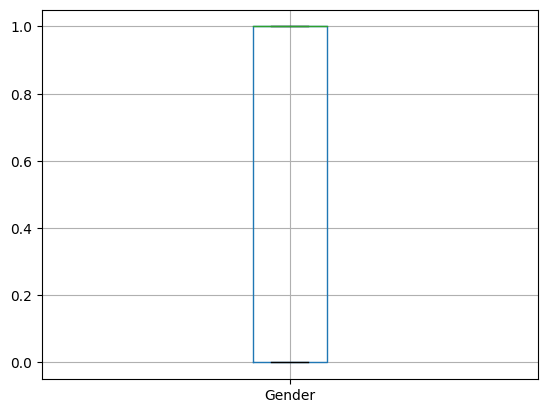

In [57]:
df[['Gender']].boxplot()

<AxesSubplot:>

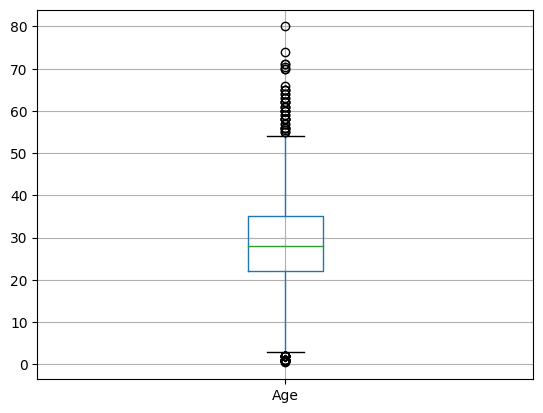

In [66]:
df[['Age']].boxplot()

q1--> 24.0
q2--> 28.0
q3--> 33.0
upper_tail--> 46.5
lower_tail--> 10.5
mean--> 29.017957351290686
28.0


<AxesSubplot:>

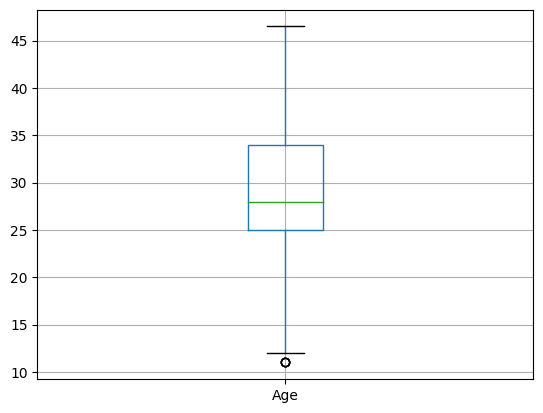

In [72]:
q1=df['Age'].quantile(0.25)
q2=df['Age'].quantile(0.50)
q3=df['Age'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['Age'].mean()))

df['Age'].median()

size_df=df[['Age']].loc[(df['Age'] < upper_tail) & 
                                   (df['Age'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['Age'] > upper_tail) |
                (df['Age'] < lower_tail), 'Age'] = upper_tail


df[['Age']].boxplot()

<AxesSubplot:>

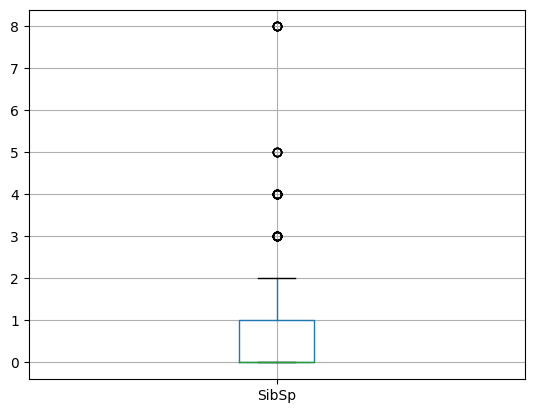

In [67]:
df[['SibSp']].boxplot()

q1--> 0.0
q2--> 0.0
q3--> 1.0
upper_tail--> 2.5
lower_tail--> -1.5
mean--> 0.4264870931537598
0.0


<AxesSubplot:>

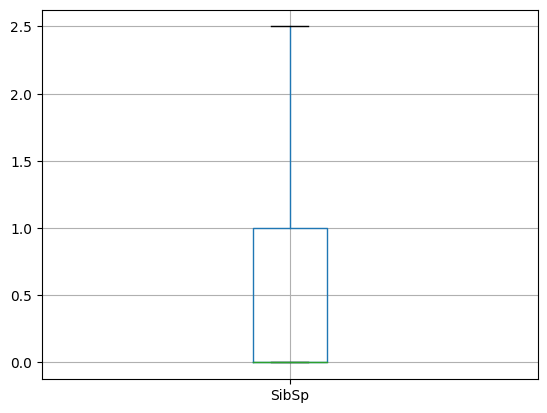

In [76]:
q1=df['SibSp'].quantile(0.25)
q2=df['SibSp'].quantile(0.50)
q3=df['SibSp'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['SibSp'].mean()))

df['SibSp'].median()

size_df=df[['SibSp']].loc[(df['SibSp'] < upper_tail) & 
                                   (df['SibSp'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['SibSp'] > upper_tail) |
                (df['SibSp'] < lower_tail), 'SibSp'] = size_df


df[['SibSp']].boxplot()

<AxesSubplot:>

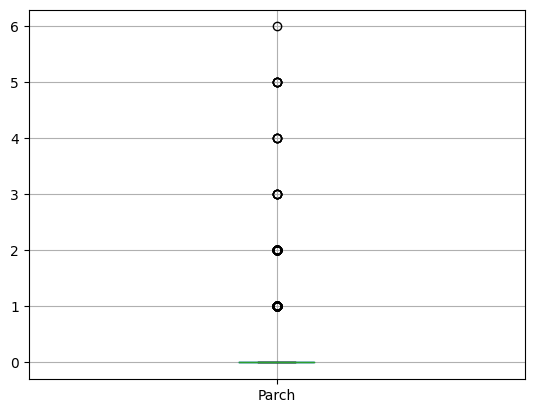

In [77]:
df[['Parch']].boxplot()

<AxesSubplot:>

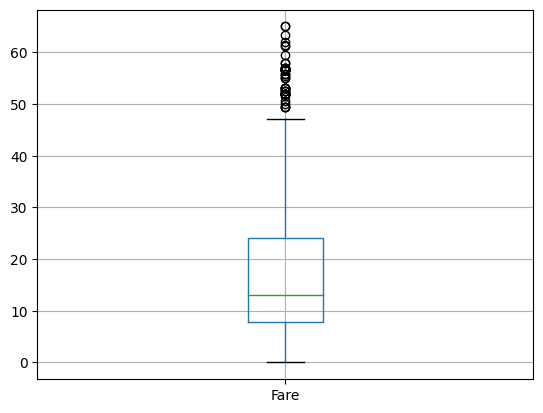

In [78]:
df[['Fare']].boxplot()

q1--> 7.9104
q2--> 13.0
q3--> 18.75
upper_tail--> 35.0094
lower_tail--> -8.349
mean--> 14.716893490460157
13.0


<AxesSubplot:>

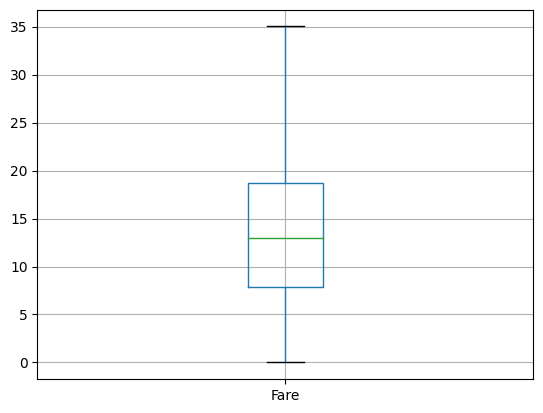

In [82]:
q1=df['Fare'].quantile(0.25)
q2=df['Fare'].quantile(0.50)
q3=df['Fare'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['Fare'].mean()))

df['Fare'].median()

size_df=df[['Fare']].loc[(df['Fare'] < upper_tail) & 
                                   (df['Fare'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['Fare'] > upper_tail) |
                (df['Fare'] < lower_tail), 'Fare'] = upper_tail


df[['Fare']].boxplot()

<AxesSubplot:>

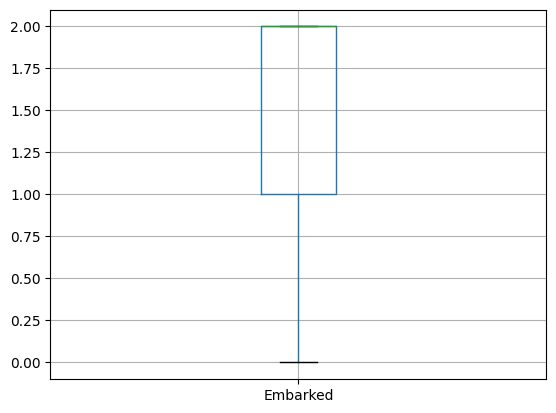

In [83]:
df[['Embarked']].boxplot()

# Feature selection

In [85]:
df.corr()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.334297,-0.539358,0.017960,0.036764,0.082218,0.125732,-0.167705
Pclass,-0.334297,1.000000,0.131900,-0.222032,0.023180,0.018443,-0.317007,0.162098
Gender,-0.539358,0.131900,1.000000,0.004309,-0.167885,-0.245489,-0.120736,0.108262
Age,0.017960,-0.222032,0.004309,1.000000,0.042824,0.089408,0.184759,0.043804
SibSp,0.036764,0.023180,-0.167885,0.042824,1.000000,0.409366,0.400826,0.038362
Parch,0.082218,0.018443,-0.245489,0.089408,0.409366,1.000000,0.412874,0.039798
Fare,0.125732,-0.317007,-0.120736,0.184759,0.400826,0.412874,1.000000,-0.005482
Embarked,-0.167705,0.162098,0.108262,0.043804,0.038362,0.039798,-0.005482,1.000000


<AxesSubplot:>

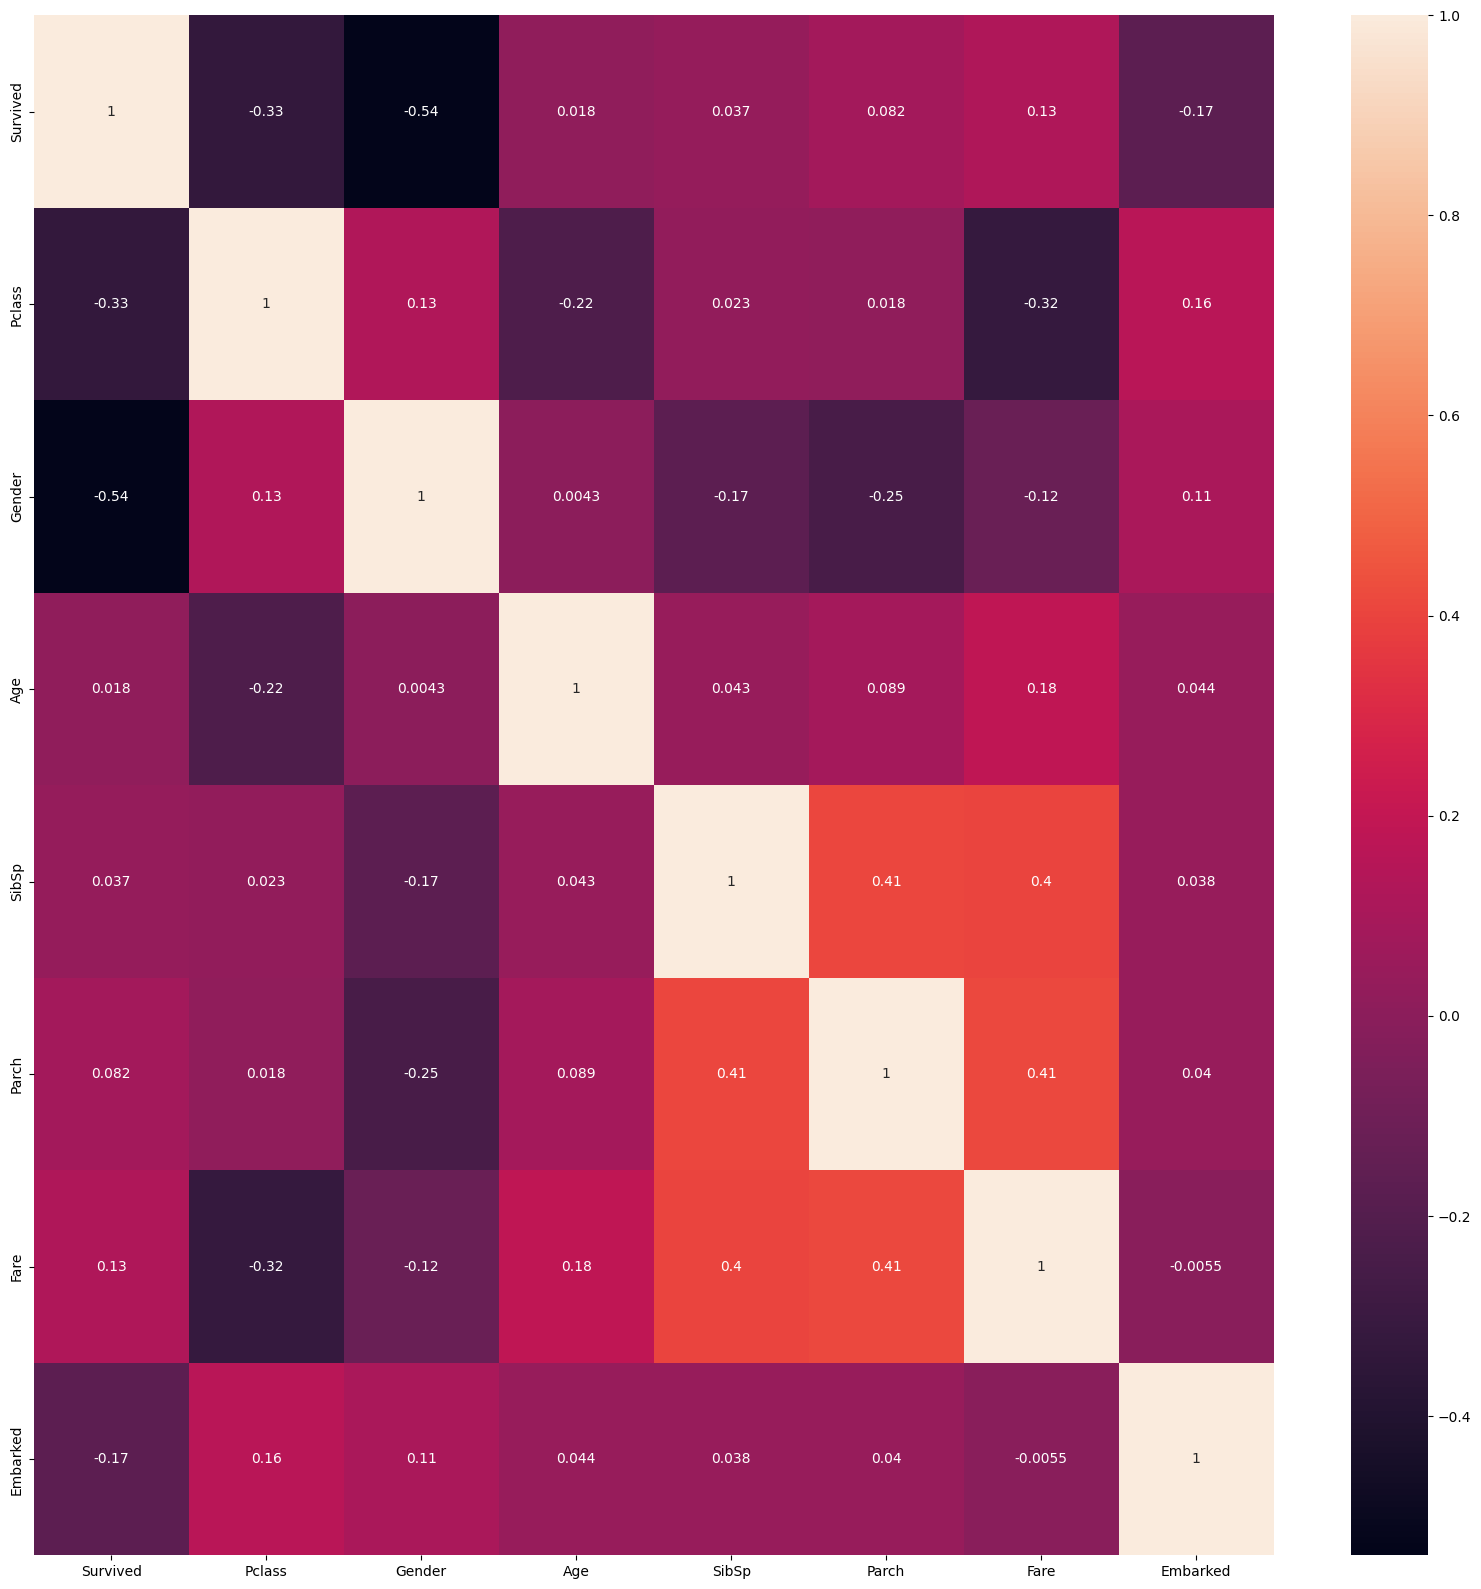

In [86]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)

# Model Training

In [87]:
x = df.drop('Survived',axis = 1)
y = df['Survived']

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1,stratify =y)

In [102]:
titanic_model = LogisticRegression()
titanic_model.fit(x_train,y_train)

LogisticRegression()

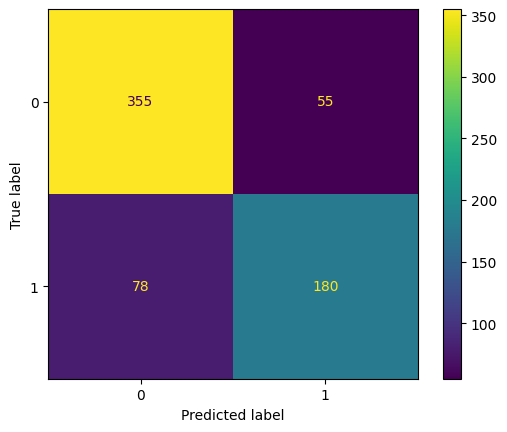

In [103]:
# Training Data
plot_confusion_matrix(titanic_model, x_train, y_train)

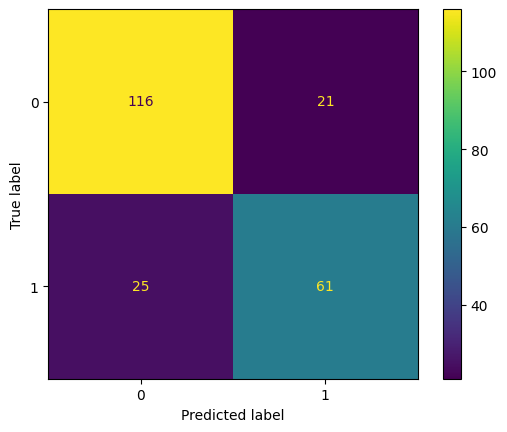

In [104]:
# Training Data
plot_confusion_matrix(titanic_model, x_test, y_test)

In [105]:
# Training Accuracy
titanic_model.score(x_train, y_train)

0.8008982035928144

In [106]:
# Testing Accuracy
titanic_model.score(x_test, y_test)

0.7937219730941704

# Model Evaluation

In [107]:
# # prediction
y_pred = titanic_model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [108]:
# prediction probability
y_pred_proba = titanic_model.predict_proba(x_test)
y_pred_proba

array([[0.48386769, 0.51613231],
       [0.90072635, 0.09927365],
       [0.8324126 , 0.1675874 ],
       [0.90889127, 0.09110873],
       [0.776964  , 0.223036  ],
       [0.78151118, 0.21848882],
       [0.8933217 , 0.1066783 ],
       [0.38216943, 0.61783057],
       [0.89339842, 0.10660158],
       [0.26999669, 0.73000331],
       [0.89339842, 0.10660158],
       [0.48364048, 0.51635952],
       [0.57890652, 0.42109348],
       [0.80156178, 0.19843822],
       [0.89278092, 0.10721908],
       [0.09710669, 0.90289331],
       [0.86603379, 0.13396621],
       [0.30223759, 0.69776241],
       [0.89651257, 0.10348743],
       [0.90363461, 0.09636539],
       [0.05773708, 0.94226292],
       [0.35891838, 0.64108162],
       [0.86608398, 0.13391602],
       [0.89339842, 0.10660158],
       [0.88957126, 0.11042874],
       [0.6112965 , 0.3887035 ],
       [0.58967807, 0.41032193],
       [0.89339842, 0.10660158],
       [0.94441048, 0.05558952],
       [0.76977155, 0.23022845],
       [0.

In [109]:
# Testing data
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cnf_matrix)

print("*"*45)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[116  21]
 [ 25  61]]
*********************************************
Accuracy Score: 0.7937219730941704
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       137
           1       0.74      0.71      0.73        86

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [110]:
# Training data

# prediction
y_pred_train = titanic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)

# Visualization

print("*"*45)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[355  55]
 [ 78 180]]
*********************************************
Accuracy Score: 0.8008982035928144
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       410
           1       0.77      0.70      0.73       258

    accuracy                           0.80       668
   macro avg       0.79      0.78      0.79       668
weighted avg       0.80      0.80      0.80       668



# AUC-ROC Curve

In [111]:
# prediction probability
y_pred_proba = titanic_model.predict_proba(x_train)
y_pred_proba[:,1]  # We are getting class 1 probability

array([0.15896547, 0.74755828, 0.42041547, 0.44123464, 0.09694239,
       0.11275776, 0.83741655, 0.47494988, 0.09335572, 0.70103576,
       0.1117315 , 0.13396755, 0.13396675, 0.17451359, 0.17688085,
       0.1103867 , 0.09986759, 0.16656889, 0.90750783, 0.10659123,
       0.1670281 , 0.14720663, 0.63735974, 0.83560903, 0.67706346,
       0.1161821 , 0.41461048, 0.4199487 , 0.10914538, 0.07274187,
       0.21985736, 0.0802045 , 0.22789446, 0.19323482, 0.10604928,
       0.29895081, 0.21736252, 0.13391011, 0.77087431, 0.10909635,
       0.17403282, 0.22547048, 0.93720857, 0.11043715, 0.10813171,
       0.41380434, 0.66599566, 0.78590692, 0.3505705 , 0.71481703,
       0.71853906, 0.93631543, 0.22547048, 0.08000943, 0.41811681,
       0.72371523, 0.5104478 , 0.74581816, 0.11180708, 0.39755859,
       0.54099358, 0.50506424, 0.04942096, 0.15155096, 0.17112847,
       0.16519732, 0.16702778, 0.55009854, 0.08555316, 0.93709901,
       0.16107754, 0.67709806, 0.74439481, 0.78590459, 0.79214

In [112]:
fpr, tpr, thresh = roc_curve(y_train, y_pred_proba[:,1])

Text(0.5, 1.0, 'Reciever Operating Characteristics')

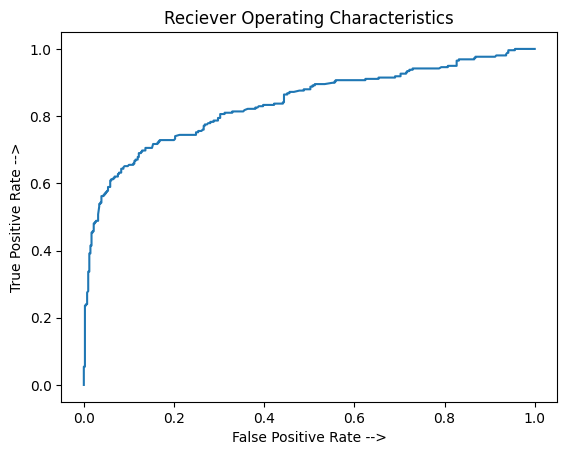

In [113]:
# Plot AUC-ROC
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate -->")
plt.ylabel("True Positive Rate -->")
plt.title("Reciever Operating Characteristics")

# Training on single row

In [114]:
x.head(1).T

,0
Pclass,3.00
Gender,1.00
Age,22.00
SibSp,1.00
Parch,0.00
Fare,7.25
Embarked,2.00


In [115]:
x.head(1).T.shape

(7, 1)

In [116]:
columns = x.columns
print(columns)

Index(['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')


In [117]:
len(columns)

7

In [118]:
pclass_dict = {'pclass_1':1,'pclass_2':2,'pclass_3':3}
gender_dict = {'male':1,'female':0}
embarked_dict = {'S':2,'C':0,'Q':1}

In [129]:
# user intput
Pclass = 'pclass_1'
Gender = 'male'
Age = 50
SibSp = 1
Parch = 2
Fare = 5
Embarked = 'S'

In [130]:
columns

Index(['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [131]:
array = np.zeros(columns.shape[0],dtype = int)
array

array([0, 0, 0, 0, 0, 0, 0])

In [132]:
len(columns)

7

In [133]:
array = np.zeros(columns.shape[0],dtype = int)
array[0] = pclass_dict[Pclass]
array[1] = gender_dict[Gender]
array[2] = Age
array[3] = SibSp
array[4] = Parch
array[5] = Fare
array[6] = embarked_dict[Embarked]
array

array([ 1,  1, 50,  1,  2,  5,  2])

In [139]:
passenger_survived = titanic_model.predict([array])[0]

if passenger_survived == 0:
    print('The passenger did not survived.')
else:
    print('The passenger has survived and happily making his onward journey.')

The passenger did not survived.


In [140]:
# store all this column is json 
titanic_data  = {'pclass_dict':pclass_dict,'gender_dict':gender_dict,'embarked_dict':embarked_dict,"columns":list(columns)}
titanic_data

{'pclass_dict': {'pclass_1': 1, 'pclass_2': 2, 'pclass_3': 3},
 'gender_dict': {'male': 1, 'female': 0},
 'embarked_dict': {'S': 2, 'C': 0, 'Q': 1},
 'columns': ['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']}

In [141]:
import json

with open("titanic_data.json", "w") as f:
    json.dump(titanic_data, f)

In [142]:
# Save Model in Pickle File
import pickle

with open("titanic_model.pkl", "wb") as f:
    pickle.dump(titanic_model, f)